# 17-9. 프로젝트: 다양한 OCR 모델 비교하기

* Google OCR API, keras-ocr, tesseract 세 가지 OCR 모델을 비교했다.   
   
   
* 최근 유튜브가 '사용자 자막 업로드' 기능을 없앴다. 유튜브를 통해 전 세계적으로 부쩍 소비가 많아진 한국 TV 프로그램 콘텐츠에 자발적으로 달리던 자막들이 사라질 위기다. 예능 프로그램 내 자막을 텍스트로 만들어주는 기능이 있다면, 해외 팬들이 번역해 보기도 수월하고 한국어 공부에도 도움이 될 것이라 생각해 만들어보기로 했다.   
   
   
* Google OCR API 가 속도도 크게 느리지 않고 한글 인식도 웬만큼 됐다 (예능 자막에는 로고나 특이한 글꼴, 구분이 어려운 색상 등이 많기 때문에 완전히 정확하진 않다). keras-ocr은 배웠던 대로 한글로 학습되어 있지 않아 알 수 없는 결과가 나왔다. tesseract는 왜인지 한글 패키지를 설치하고 lang='kor' 로 설정해도 예능의 한글 자막을 제대로 분리해내지 못했다. 아마도 예능 자막의 글꼴이 대부분 특이하게 생겼기 때문일 것 같다.

## 필요한 모듈 import

In [1]:
import matplotlib.pyplot as plt
import keras_ocr

from google.cloud import vision
import io
    
import os
import pytesseract
from PIL import Image, ImageDraw
from pytesseract import Output
import matplotlib.pyplot as plt

## 검증용 데이터셋 준비

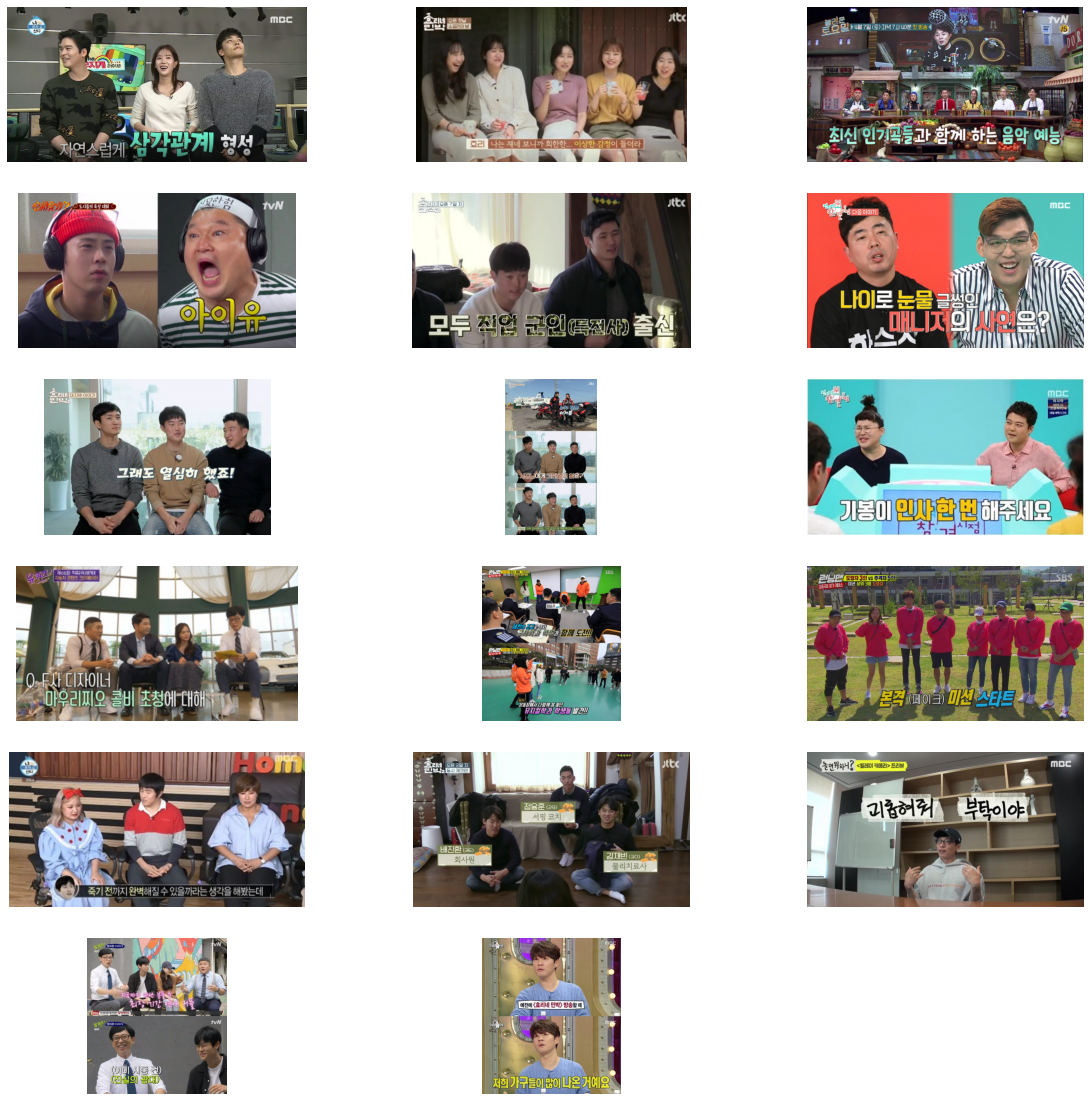

In [2]:
images_path = 'sample_imgs/'
images = os.listdir(images_path)

for i in images:
    if os.path.isdir(images_path + i):
        images.remove(i)

plt.figure(figsize=(20, 20))

for idx, img in enumerate(images):
    if os.path.isdir(images_path + img):
        continue
    else:
        plt.subplot(6, 3, idx+1)
        plt.axis('off')

        curr_img = plt.imread(images_path + img)

        plt.imshow(curr_img)

## Google OCR API, keras-ocr, Tesseract로 테스트 진행

### Google OCR API

In [3]:
def detect_text(path):
    """Detects text in the file."""
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    # print('Texts:')
    
    descs = []
    vertices = []

    for text in texts:
        # print('\n"{}"'.format(text.description))
        
        '''
        vertices = (['({},{})'.format(vertex.x, vertex.y)
                     for vertex in text.bounding_poly.vertices])
        
        '''
        # print(text.description)
        # print(text.bounding_poly)
        # curr_descs = [txt for txt in text.description.split('\n')]
        curr_descs = text.description.split('\n')
        curr_vertices = ([(vertex.x, vertex.y) for vertex in text.bounding_poly.vertices])
        
        # print(curr_descs)
        # print(curr_vertices)
        
        descs.append(curr_descs)
        vertices.append(curr_vertices)
    
    # print('bounds: {}'.format(','.join(vertices)))
    # print(bounds)

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))
        
    return descs[0], vertices

In [4]:
# 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

plt.figure(figsize=(20, 20))

for idx, img in enumerate(images):
    if os.path.isdir(images_path + img):
        continue
    else:
        curr_img = Image.open(images_path + img)
        curr_descs, curr_vertices = detect_text(images_path + img)

        '''
        curr_img_draw = ImageDraw.Draw(curr_img)

        for idx, vertex in enumerate(curr_vertices):
            print(vertex)
            curr_img_draw.polygon([
                vertex[0][0], vertex[0][1],
                vertex[1][0], vertex[1][1],
                vertex[2][0], vertex[2][1],
                vertex[3][0], vertex[3][1]
            ], None, 'red')

        plt.subplot(6, 3, idx+1)
        plt.axis('off')

        # curr_img = plt.imread(images_path + img)

        plt.imshow(curr_img_draw)
        '''
        print('Image #' + str(idx+1) + ': ' + str(curr_descs))
    

# 입력 이미지 경로를 지정해 주세요.
# path = 'test_image.jpg'

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
# detect_text(path)

-rw-rw-r-- 1 aiffel0042 aiffel0042 2307 10월 13 14:31 /home/aiffel0042/Documents/aiffel_local/20201007/ocr_python/jonggukang_at_gmail_dot_com.json
Image #1: ['MBC', '혼자', '산다', 'he', 'Live', '차연스럽게 삼각관계 형성', '']
Image #2: ['uttc', 'OZILI OE', '민박 E', '효리 나는 재네 보니까 회한한 이상한 감정이 들더라', '']
Image #3: ['놀라운', '는요일>u월 7일 (토) 퍼녁 711 U0분 초 방송', 'tvN', '15', 'TOUR', 'DOR', '전문', '최신 인기픽들과 함께 하는 음악 예능)', 'KO OK', '']
Image #4: ['도시들의 육성 대회', 'tvN', '']
Image #5: ['uttc', '모두 업 군입특전사) 출신', '']
Image #6: ['MBC', '다음 이야기', '나이로 눈물글썽인', 'OHILIT O 2', '']
Image #7: ['OZILI DIO OI0IJI', '그래도 열심히 했죠!', '']
Image #8: ['OZILI OXICI OIOIDI', 'Jtbc', '사장님에게 고마웠던 일은?', 'OZILII DXIQ OIOIJ', '명성 E짜 감사했어요 그거 없었으면 저희 죽었을(?) 거예요!', '']
Image #9: ['MBC', '러시아', '기봉이 민사한 번해주세요', '차:', '']
Image #10: ['제66화 1의40741', '|자동차 콘텐츠 크리에이I터', '0FI CIKIOILI', '마우리찌오 콜비 초청에 CH해 T', '']
Image #11: ['런닉맨 HA ■ 그라운데', 'SBS', '세친이 조고로 나지', 'E학과 학생과 함께 도전!!', '럭키', '운동장에서 다할께 몸 풀던', '뮤지컬학과 학생들 발!!', '']
Image #12: ['런닉맨 도망자 3인 VS 추

<Figure size 1440x1440 with 0 Axes>

### keras-ocr

Looking for /home/aiffel0042/.keras-ocr/craft_mlt_25k.h5
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Looking for /home/aiffel0042/.keras-ocr/crnn_kurapan.h5


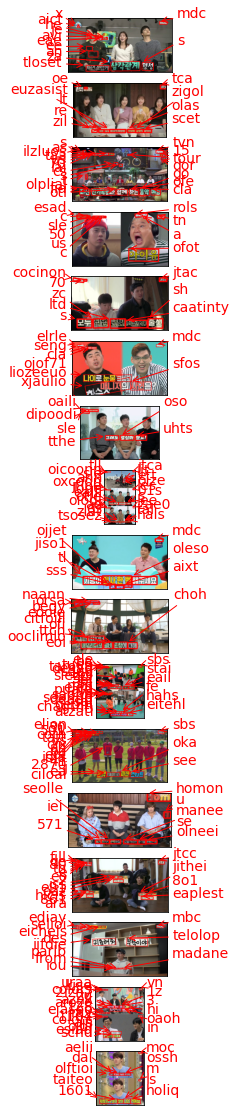

In [5]:
# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

images_kerasocr = [ keras_ocr.tools.read(images_path + img) for img in images]
prediction_groups = [pipeline.recognize([images_path + img]) for img in images]


# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images_kerasocr[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

### Tesseract

In [6]:
def crop_word_regions(image_path, output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='kor',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = 'sample_imgs/output/'
img_file_path = images_path + '323195_429861_508.jpg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)
print(cropped_image_path_list)

def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='kor',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

'''
for idx, img in enumerate(images):
    curr_cropped_images = crop_word_regions(images_path + img, work_dir + str(idx+1))
    recognize_images(curr_cropped_images) # 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
    
    plt.figure(figsize=(20, 20))
    
    for idx2, cropped in curr_cropped_images:
        plt.subplot(len(curr_cropped_images), 1, idx2+1)
        plt.axis('off')

        curr_img = plt.imread(work_dir + str(idx+1) + cropped)
        plt.imshow(curr_img)
'''

sample_imgs/output/0000.png
['sample_imgs/output/0000.png']


"\nfor idx, img in enumerate(images):\n    curr_cropped_images = crop_word_regions(images_path + img, work_dir + str(idx+1))\n    recognize_images(curr_cropped_images) # 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.\n    \n    plt.figure(figsize=(20, 20))\n    \n    for idx2, cropped in curr_cropped_images:\n        plt.subplot(len(curr_cropped_images), 1, idx2+1)\n        plt.axis('off')\n\n        curr_img = plt.imread(work_dir + str(idx+1) + cropped)\n        plt.imshow(curr_img)\n"